# Pendahuluan
## Latar Belakang
house_rent ini berisi informasi tentang harga sewa rumah, apartemen, dan flat dalam berbagai kota. Penyewa seringkali mempertimbangkan berbagai faktor sebelum memutuskan untuk menyewa properti, seperti jumlah kamar tidur, ukuran, lokasi, tingkat furnitur, preferensi penyewa, dan lain-lain. Oleh karena itu, memiliki model prediksi harga sewa berdasarkan faktor-faktor ini dapat membantu penyewa dan pemilik properti untuk mengambil keputusan yang lebih baik.

## Tujuan
Tujuan dari model prediksi ini adalah untuk mengembangkan suatu algoritma yang dapat memprediksi harga sewa properti berdasarkan berbagai fitur yang terdapat dalam house_rent ini. Dengan memiliki model ini, pemilik properti dapat menentukan harga sewa yang wajar berdasarkan karakteristik properti mereka, dan penyewa dapat memperoleh perkiraan harga sewa yang realistis sebelum melakukan penawaran atau memutuskan untuk menyewa properti.

## Penjelasan house_rent
- BHK (Number of Bedrooms, Hall, Kitchen): Variabel ini menunjukkan jumlah kamar tidur, ruang tamu, dan dapur dalam properti. Ini adalah faktor penting dalam menentukan ukuran dan kenyamanan properti.

- Rent: Variabel ini merupakan harga sewa properti dalam mata uang yang digunakan dalam house_rent. Ini adalah variabel target yang akan diprediksi oleh model. (Target)

- Size: Variabel ini menunjukkan ukuran properti dalam satuan kaki persegi. Ukuran properti bisa menjadi faktor penting dalam menentukan harga sewa.

- Floor: Variabel ini menunjukkan lantai tempat properti berada serta jumlah total lantai dalam bangunan. Informasi ini memberikan gambaran tentang posisi properti dalam bangunan.

- Area Type: Variabel ini menunjukkan jenis pengukuran yang digunakan untuk menghitung ukuran properti, apakah berdasarkan luas keseluruhan (super area), luas karpet (carpet area), atau luas bangunan (build area).

- Area Locality: Variabel ini menyediakan informasi tentang lokasi properti, yaitu lingkungan di mana properti berada. Faktor ini dapat mempengaruhi harga sewa berdasarkan keamanan, fasilitas, aksesibilitas, dan lain-lain.

- City: Variabel ini menunjukkan kota di mana properti berlokasi. Setiap kota mungkin memiliki pasar sewa yang berbeda dan variasi harga sewa yang signifikan.

- Furnishing Status: Variabel ini mengindikasikan status perabotan dalam properti, apakah sudah berperabotan lengkap (furnished), sebagian berperabotan (semi-furnished), atau tidak berperabotan (unfurnished).

- Tenant Preferred: Variabel ini menggambarkan tipe penyewa yang diinginkan oleh pemilik atau agen properti. Preferensi ini bisa mencakup keluarga, mahasiswa, profesional, dan lain-lain.

- Bathroom: Variabel ini menunjukkan jumlah kamar mandi dalam properti. Jumlah kamar mandi dapat mempengaruhi kenyamanan dan nilai properti.

- Point of Contact: Variabel ini memberikan informasi tentang orang yang dapat dihubungi untuk informasi lebih lanjut tentang properti.

# Data Preparation

In [59]:
import pandas as pd

In [60]:
house_rent_raw = pd.read_csv("./data_input/House_Rent_Dataset.csv")
house_rent_raw

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [61]:
house_rent_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


<b>Insigth</b><br>
Dari info dataset, didapatkan bahwa ada beberapa data yang tidak sesuai dengan tipe datanya seperti Posted.On yang bertipe data chr lalu diubah menjadi date. Selain itu harus dilakukan explorasi lanjutan dengan beberapa kolom seperti Floor, Area.Type, Area.Locality, City, Furnishing.Status, Tenant.Preferred, Point.of.Contact karena atribut tersebut terindikasi sebagai data yang bersifat kategorikal.

In [62]:
# Merubah tipe data 'Posted On' menjadi datetime
house_rent_raw['Posted On'] = pd.to_datetime(house_rent_raw['Posted On'])

In [63]:
# Menghitung jumlah nilai unik dalam kolom-kolom terindikasi kategorikal
selected_cols = ["Floor", "Area Type", "Area Locality", "City", "Furnishing Status", "Tenant Preferred", "Point of Contact"]

result = house_rent_raw[selected_cols].nunique()
print(result)

Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Point of Contact        3
dtype: int64


<b>Insigth</b><br>
Dari hasil melihat jumlah data unique dari kolom yang diinidkasi kategori, bisa dilakukan perubahan factor terhadap kolom selain Area.Locality dan Floor. akan tetapi pada kolom Floor harus dilakukan analisis lanjutan agar mengetahui apakah data tersebut dapat di lakukan pemrosesan agar data tersebut dapat dilakukan analisis lanjutan untuk digunakan modeling atau tidak

In [64]:
# Mengubah tipe data category kolom kecuali "Floor" dan "Area Locality"
for col in selected_cols:
    if col not in ["Floor", "Area Locality"]:
        house_rent_raw[col] = house_rent_raw[col].astype('category')

### Melakukan Eksplorasi Lebih Dalam Terhadap Data "<i>Floor</i>"

In [65]:
house_rent_raw['Floor'].sample(10, replace=False)

1239       10 out of 22
2970         3 out of 3
1879    Ground out of 2
2551    Ground out of 4
3507    Ground out of 2
2165         2 out of 3
4742         1 out of 4
1381        5 out of 20
2751         1 out of 2
1450         4 out of 7
Name: Floor, dtype: object

<b>Insigth</b><br>
Kolom floor berisikan data keberadaan properti yang akan disewakan. terdapat 3 perbedaan pada data tersebut yaitu basement(berada dibawah tanah, ground(berada dilantai dasar), dan upper(berada diatas lantai 1 atau lebih). oleh karenanya data tersebut akan dirubah sesuai dengan kategorinya, contohnya 'Ground out of 4' -> Ground, '5 out of 14' -> upper.

In [66]:
# Fungsi untuk mengubah data berdasarkan kriteria
def transform_floor(floor_str):
    if "Ground" in floor_str:
        return "Ground"
    elif "Basement" in floor_str:
        return "Basement"
    else:
        nums = [int(s) for s in floor_str.split() if s.isdigit()]
        if len(nums) > 0 and nums[0] > 1:
            return "Upper"
        elif len(nums) > 0 and nums[0] == 1:
            return "Ground"
        else:
            return floor_str

In [67]:
house_rent_raw['Floor'] = house_rent_raw['Floor'].apply(transform_floor)

# Menampilkan DataFrame setelah perubahan
house_rent_raw

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,Ground,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,Ground,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,Ground,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,Ground,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,Upper,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,Ground,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,Upper,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,Upper,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


# Exploratory Data Analyst

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# melakukan seleksi terhadap data-data yang akan digunakan
house_rent = house_rent_raw.drop(["Area Locality"], axis=1)

In [70]:
house_rent

,Posted On,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,Ground,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,Ground,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,Ground,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,Ground,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,Upper,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,Ground,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,Upper,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,Upper,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [71]:
# Menghitung jumlah missing values pada setiap kolom
print(house_rent.isnull().sum())

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


## Analisis Kolom Tanggal

In [72]:
# Mengubah tanggal menjadi bulan
house_rent['Posted Month'] = house_rent['Posted On'].dt.to_period('M')

# Membuat agregat data dengan mean rent tiap bulan
aggregated_data = house_rent.groupby('Posted Month')['Rent'].mean()

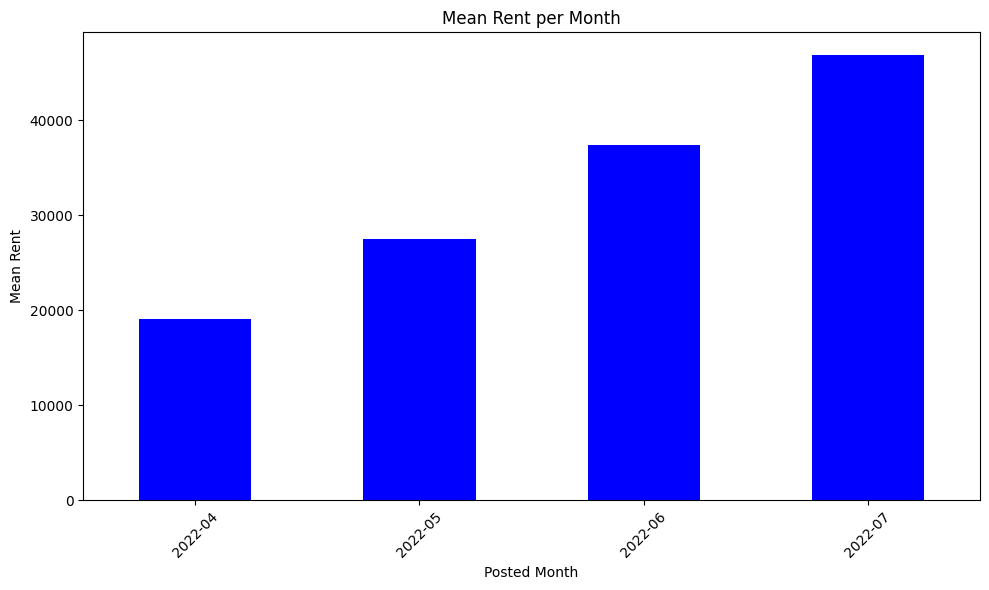

In [73]:
# Menampilkan visualisasi dengan bar plot
plt.figure(figsize=(10, 6))
aggregated_data.plot(kind='bar', color='blue')
plt.xlabel('Posted Month')
plt.ylabel('Mean Rent')
plt.title('Mean Rent per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
# Menghitung statistik agregat
house_rent.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


## Analisis Kolom Numeric

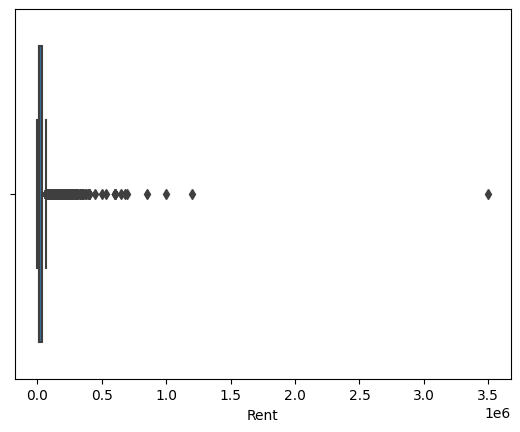

In [75]:
# Menampilkan boxplot untuk kolom numerik
sns.boxplot(x=house_rent['Rent'])
plt.xlabel('Rent')
plt.show()

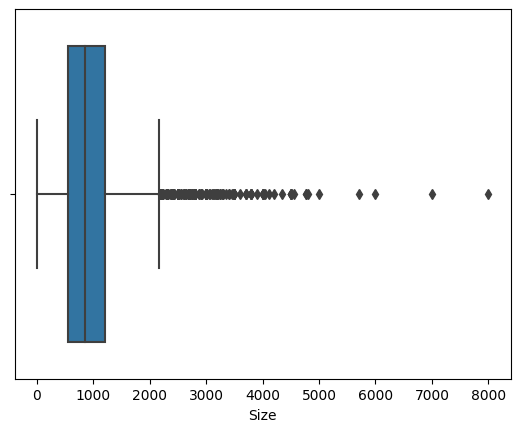

In [76]:
# Menampilkan boxplot untuk kolom numerik
sns.boxplot(x=house_rent['Size'])
plt.xlabel('Size')
plt.show()

### Melakukan Pehapusan Outliers

#### Menghapus Data Outliers "<i>Rent</i>"

In [77]:
# Menghitung nilai IQR untuk kolom "Rent"
Q1 = house_rent['Rent'].quantile(0.25)
Q3 = house_rent['Rent'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas atas dan batas bawah untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghitung jumlah outlier berdasarkan batas atas dan batas bawah
outliers_rent = house_rent[(house_rent['Rent'] < lower_bound) | (house_rent['Rent'] > upper_bound)]

# Menampilkan jumlah outlier
print("Jumlah Semua Data:", len(house_rent))
print("Jumlah outlier yang akan dihapus:", len(outliers_rent))

Jumlah Semua Data: 4746
Jumlah outlier yang akan dihapus: 520


#### Menghapus Data Outliers "<i>Size</i>"

In [78]:
# Menghitung nilai IQR untuk kolom "Rent"
Q1 = house_rent['Size'].quantile(0.25)
Q3 = house_rent['Size'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas atas dan batas bawah untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghitung jumlah outlier berdasarkan batas atas dan batas bawah
outliers_size = house_rent[(house_rent['Size'] < lower_bound) | (house_rent['Size'] > upper_bound)]

# Menampilkan jumlah outlier
print("Jumlah Semua Data:", len(house_rent))
print("Jumlah outlier yang akan dihapus:", len(outliers_size))

Jumlah Semua Data: 4746
Jumlah outlier yang akan dihapus: 203


In [79]:
# Menghapus data outlier dari DataFrame house_rent berdasarkan outlier_rent dan outlier_size
house_rent_cleaned = house_rent.drop(outliers_rent.index, errors='ignore')
house_rent_cleaned = house_rent_cleaned.drop(outliers_size.index, errors='ignore')

# Menampilkan DataFrame house_rent setelah penghapusan outlier
house_rent_cleaned

,Posted On,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Posted Month
0,2022-05-18,2,10000,1100,Ground,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022-05
1,2022-05-13,2,20000,800,Ground,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022-05
2,2022-05-16,2,17000,1000,Ground,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022-05
3,2022-07-04,2,10000,800,Ground,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022-07
4,2022-05-09,2,7500,850,Ground,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022-05
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,Upper,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,2022-05
4742,2022-05-15,3,29000,2000,Ground,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,2022-05
4743,2022-07-10,3,35000,1750,Upper,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,2022-07
4744,2022-07-06,3,45000,1500,Upper,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,2022-07


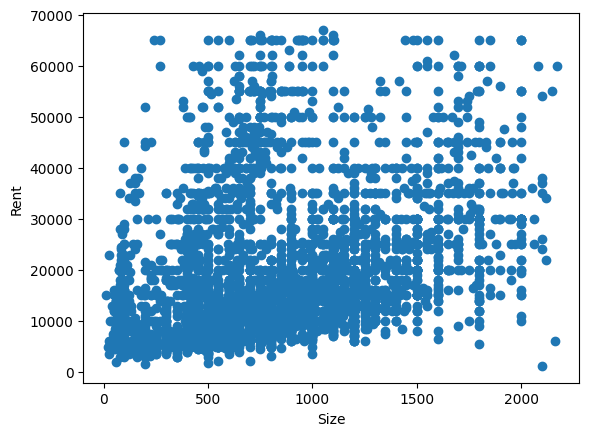

In [80]:
# Menampilkan scatter plot antara Rent dan Size
plt.scatter(house_rent_cleaned['Size'], house_rent_cleaned['Rent'])
plt.xlabel('Size')
plt.ylabel('Rent')
plt.show()

## Analisis Kolom Kategori

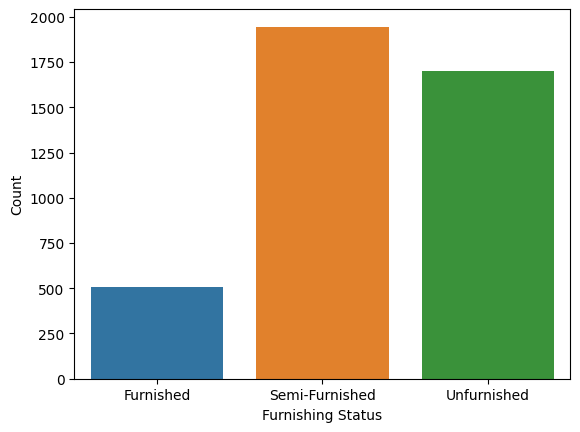

In [81]:
# Menampilkan count plot untuk variabel kategorikal
sns.countplot(x='Furnishing Status', data=house_rent_cleaned)
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.show()

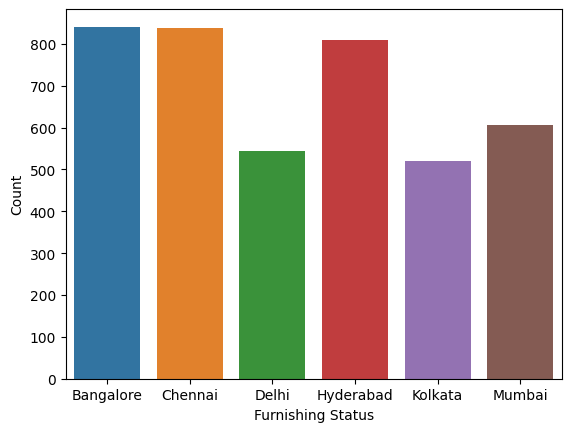

In [82]:
# Menampilkan count plot untuk variabel kategorikal
sns.countplot(x='City', data=house_rent_cleaned)
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.show()

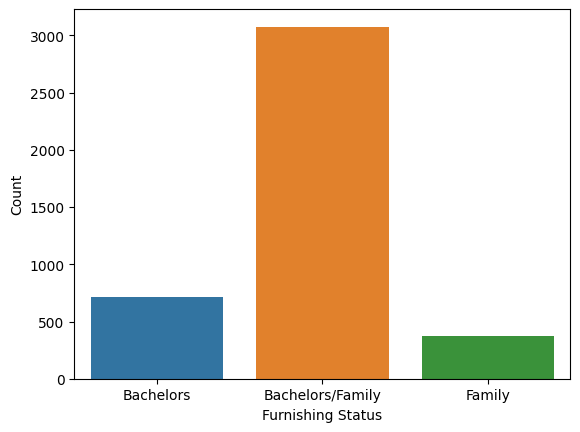

In [83]:
# Menampilkan count plot untuk variabel kategorikal
sns.countplot(x='Tenant Preferred', data=house_rent_cleaned)
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.show()

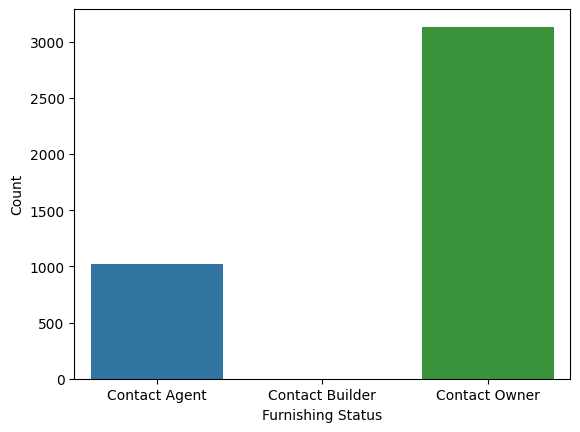

In [84]:
# Menampilkan count plot untuk variabel kategorikal
sns.countplot(x='Point of Contact', data=house_rent_cleaned)
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.show()

<b>Insigth</b><br>
Hasil visualisasi diatas menunjukan adanya data dengan kategori Contact Builder yang memiliki frekuensi sangat sedikit. oleh karenanya akan dilakukan pengecekan frekuensi terhadap kategori tersebut dan jika frekuensi sangat sedikit akan dibuang.

In [85]:
house_rent_cleaned[house_rent_cleaned['Point of Contact'] == "Contact Builder"]

,Posted On,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Posted Month
4061,2022-06-18,1,5500,400,Ground,Super Area,Hyderabad,Unfurnished,Bachelors/Family,1,Contact Builder,2022-06


Karena datanya hanya ada satu. oleh karenanya akan dibuang untuk menghindari overfiting

In [86]:
house_rent_cleaned = house_rent_cleaned.drop(house_rent_cleaned[house_rent_cleaned['Point of Contact'] == "Contact Builder"].index)

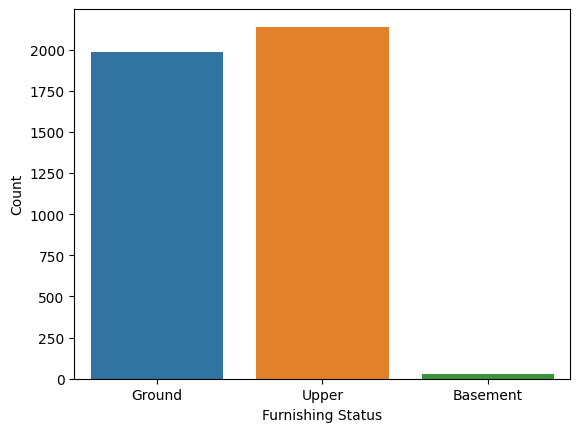

In [87]:
# Menampilkan count plot untuk variabel kategorikal
sns.countplot(x='Floor', data=house_rent_cleaned)
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.show()

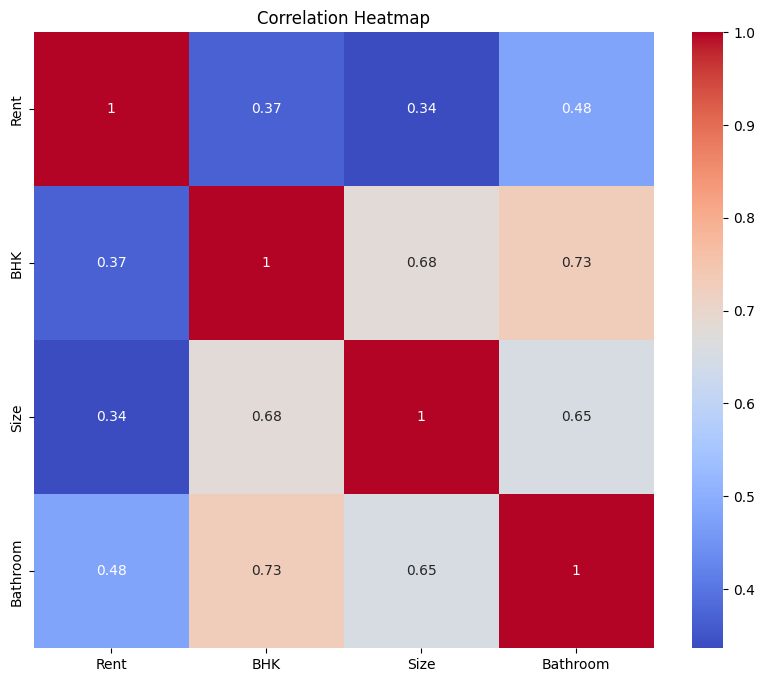

In [88]:
# Memilih hanya kolom numerik
numeric_cols = ['Rent', 'BHK', 'Size', 'Bathroom']
numeric_data = house_rent_cleaned[numeric_cols]

# Menghitung matriks korelasi
correlation_matrix = numeric_data.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


<b>Insigth</b><br>
Hasil korelasi yang ditampilkan dapat disimpulkan bahwa korelasi antara variable target(rent) dengan variable lainnya memiliki korelasi yang kecil yaitu dibawah thresshold pada umumnya 0.6, akan tetapi data tersebut akan coba digunakan pada training model

# Data Preprocessing
Karena banyak data kategori dan saat modeling dibutuhkan data yang numerik oleh karenanya semua data kategori akan dirubah menjadi numeric

In [89]:
data_prep = house_rent_cleaned.copy()

In [90]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Mengubah data kategorikal menjadi numerik dengan Label Encoding
data_prep['Posted Month'] = label_encoder.fit_transform(data_prep['Posted Month'])
data_prep['Furnishing Status'] = label_encoder.fit_transform(data_prep['Furnishing Status'])
data_prep['Tenant Preferred'] = label_encoder.fit_transform(data_prep['Tenant Preferred'])
data_prep['Point of Contact'] = label_encoder.fit_transform(data_prep['Point of Contact'])
data_prep['Area Type'] = label_encoder.fit_transform(data_prep['Area Type'])
data_prep['City'] = label_encoder.fit_transform(data_prep['City'])
data_prep['Floor'] = label_encoder.fit_transform(data_prep['Floor'])

data_prep = data_prep.drop(columns= "Posted On")

In [91]:
data_prep.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Posted Month
0,2,10000,1100,1,2,4,2,1,2,1,1
1,2,20000,800,1,2,4,1,1,1,1,1
2,2,17000,1000,1,2,4,1,1,1,1,1
3,2,10000,800,1,2,4,2,1,1,1,3
4,2,7500,850,1,1,4,2,0,1,1,1


# Modeling

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [93]:
# Memisahkan fitur dan target
X = data_prep.drop('Rent', axis=1)
y = data_prep['Rent']

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [94]:
# Inisialisasi model regresi
model_lr = LinearRegression()

# Melatih model
model_lr.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model_lr.predict(X_test)

# Evaluasi kinerja model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 7095.177042024844
Mean Squared Error: 87551416.41134106
R-squared: 0.5377555901706563


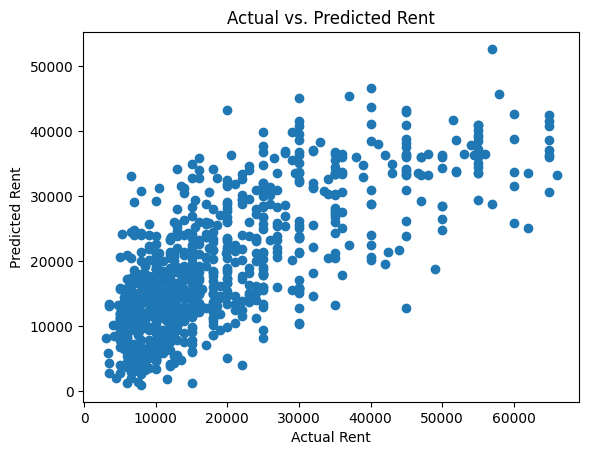

In [95]:
# Analisis residual
residuals = y_test - y_pred

# Visualisasi scatter plot antara nilai sebenarnya dan nilai prediksi
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Actual vs. Predicted Rent')
plt.show()

### Kesimpulan
* Evaluasi ini mengindikasikan bahwa model regresi yang digunakan masih memiliki ruang untuk ditingkatkan karena nilai R-squarednya yang sekitar 0.54. Ini berarti model baru berhasil menjelaskan sekitar 54% variasi dalam data, sehingga sekitar 46% variasi masih belum dapat dijelaskan oleh model.|
* MAE dan MSE juga menunjukkan bahwa ada tingkat kesalahan yang signifikan dalam prediksi nilai rent. Hal ini dapat menjadi pertimbangan penting, terutama jika prediksi yang akurat penting dalam aplikasi atau bisnis tertentu.

## Random Forest

In [96]:
# Inisialisasi model Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)

# Melatih model
model_rf.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model_rf.predict(X_test)

# Evaluasi kinerja model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 5171.449667933362
Mean Squared Error: 56298277.44172578
R-squared: 0.7027625012005151


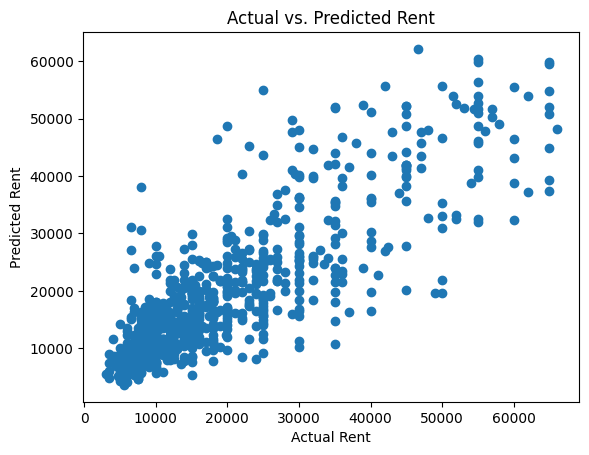

In [97]:
# Analisis residual
residuals = y_test - y_pred

# Visualisasi scatter plot antara nilai sebenarnya dan nilai prediksi
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Actual vs. Predicted Rent')
plt.show()

### Kesimpulan
* Evaluasi ini menunjukkan bahwa model Random Forest Regressor memberikan hasil yang lebih baik dibandingkan dengan model sebelumnya dalam hal prediksi rent. MAE yang lebih rendah dan MSE yang lebih rendah menunjukkan peningkatan dalam akurasi prediksi dan pengurangan kesalahan prediksi secara keseluruhan.
* R-squared yang lebih tinggi menunjukkan bahwa model ini mampu menjelaskan sekitar 70% variasi dalam data, yang lebih baik dibandingkan dengan model sebelumnya. Ini menunjukkan bahwa model Random Forest Regressor memiliki kemampuan yang lebih baik dalam menjelaskan pola atau hubungan yang ada di dalam data.